## Importing Necessary Libraries

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import numpy as np
import nltk

In [2]:
# Ensure NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lawrence\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lawrence\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lawrence\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Loading and Preprocessing the Dataset

In [3]:
df = pd.read_csv('Rating_Cleaned.csv')

# Filtering Positive and Negative Reviews
positive_reviews = df[df['Sentiment'] == 'positive']['Clean_review']
negative_reviews = df[df['Sentiment'] == 'negative']['Clean_review']

## Creating Word Clouds for Positive and Negative Reviews

In [4]:
# Creating a WordCloud for positive reviews
wordcloud_positive = WordCloud(width=1600, height=800, max_font_size=200, background_color='black').generate(' '.join(positive_reviews))

# Creating a WordCloud for negative reviews
wordcloud_negative = WordCloud(width=1600, height=800, max_font_size=200, background_color='black').generate(' '.join(negative_reviews))

## Displaying Word Clouds

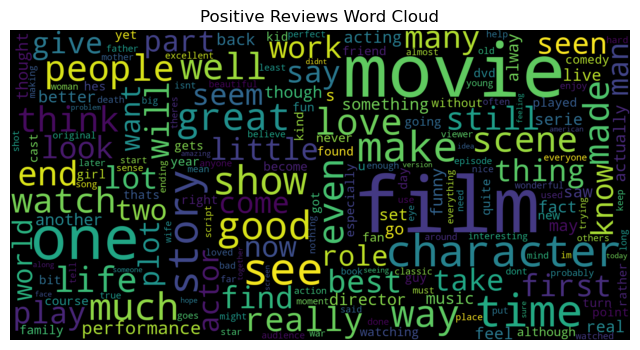

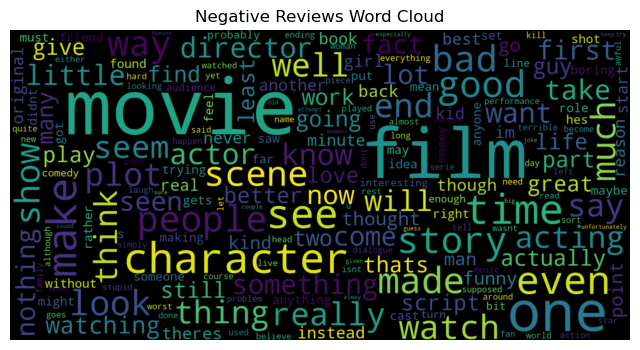

In [5]:
# Displaying the Word Cloud for positive reviews
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

# Displaying the Word Cloud for negative reviews
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()

## Analyzing Word Frequencies in Reviews

In [6]:
def tokenize_and_clean(text):
    # Tokenize and clean the reviews
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return words

# Tokenizing positive and negative reviews
positive_words = tokenize_and_clean(' '.join(positive_reviews))
negative_words = tokenize_and_clean(' '.join(negative_reviews))

# Counting word frequencies
positive_freq = Counter(positive_words)
negative_freq = Counter(negative_words)

## Displaying Top 10 Words in Reviews

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_26488\1467258540.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(positive_words, rotation=90)
C:\Users\Lawrence\AppData\Local\Temp\ipykernel_26488\1467258540.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(negative_words, rotation=90)


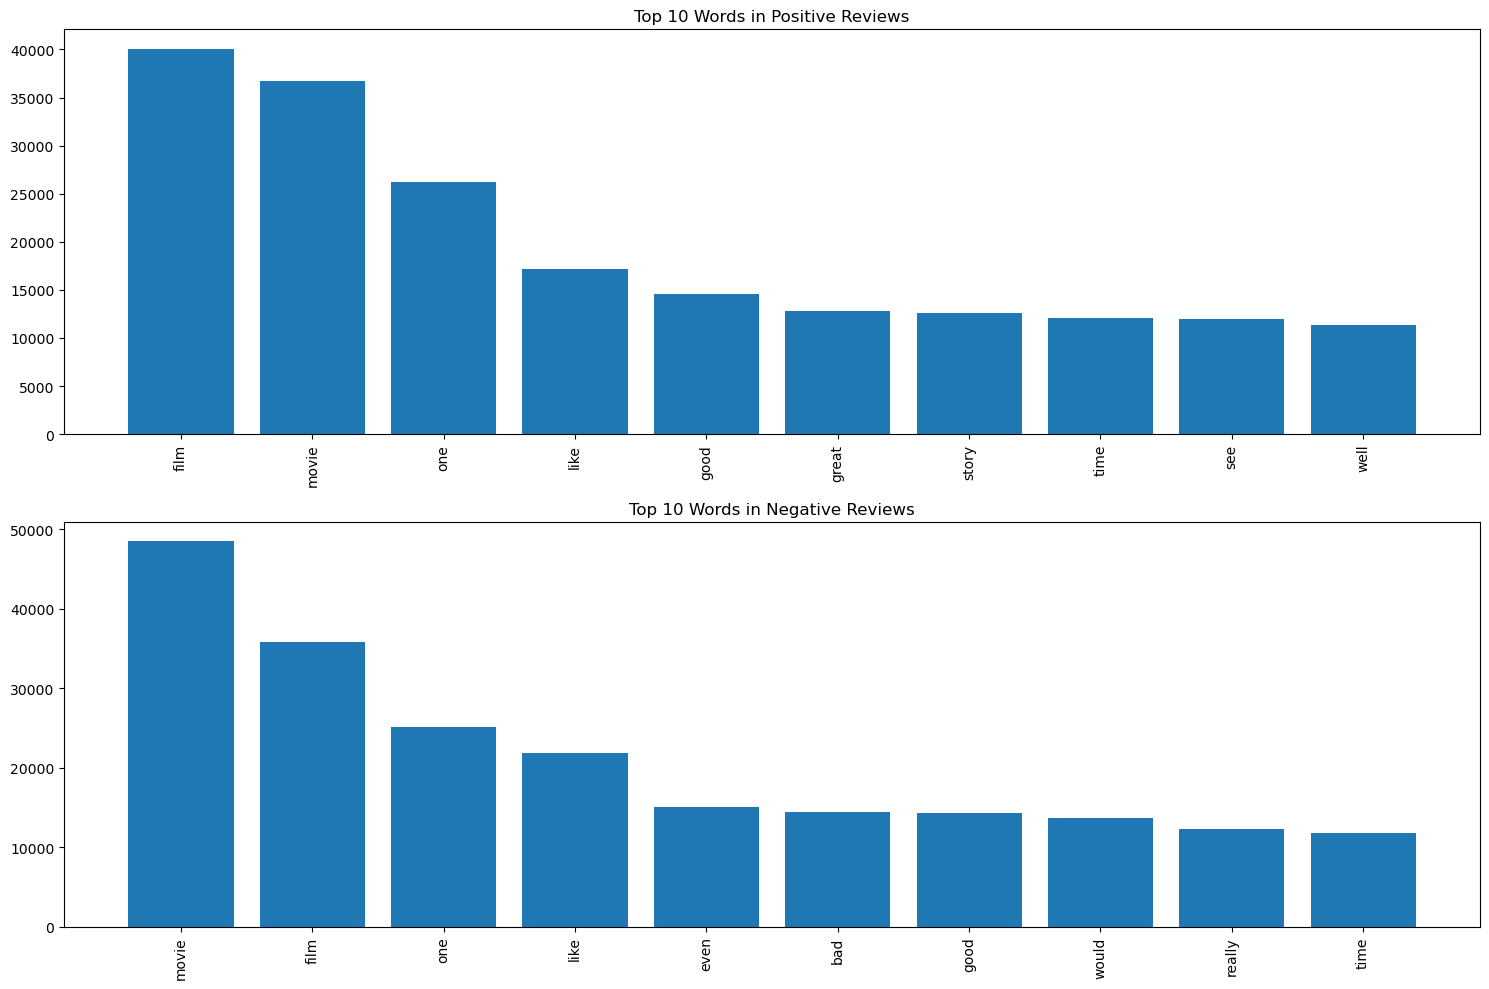

In [7]:
# Extracting top 50 words
common_positive = positive_freq.most_common(10)
common_negative = negative_freq.most_common(10)

# Separating words and counts
positive_words, positive_counts = zip(*common_positive)
negative_words, negative_counts = zip(*common_negative)

# Plotting the top words
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].bar(positive_words, positive_counts)
ax[0].set_title('Top 10 Words in Positive Reviews')
ax[0].set_xticklabels(positive_words, rotation=90)
ax[1].bar(negative_words, negative_counts)
ax[1].set_title('Top 10 Words in Negative Reviews')
ax[1].set_xticklabels(negative_words, rotation=90)
plt.tight_layout()
plt.show()


## Creating a 3D Plot of Most Common Adjectives

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lawrence\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lawrence\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lawrence\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


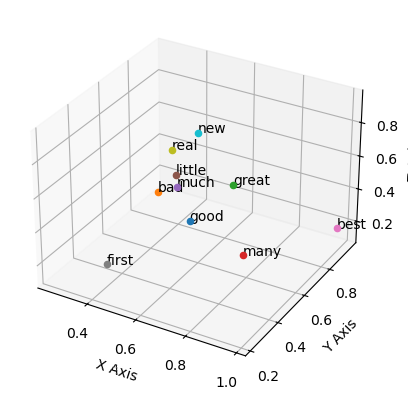

In [9]:
# Load the dataset
df = pd.read_csv('Rating_Cleaned.csv')

# Combine all reviews into a single text
all_reviews = " ".join(df['Clean_review'])

# Tokenize the text (split into words)
words = word_tokenize(all_reviews)

# Remove stopwords
words = [word for word in words if word not in stopwords.words('english')]

# Perform part-of-speech tagging
tags = pos_tag(words)

# Select adjectives
adjectives = [word for word, tag in tags if tag in ('JJ', 'JJR', 'JJS')]

# Calculate the most common adjectives
adj_freq = Counter(adjectives).most_common(10)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate XYZ coordinates for each adjective
for word, freq in adj_freq:
    x, y, z = np.random.rand(3)
    ax.scatter(x, y, z)
    ax.text(x, y, z, word)

# Set labels for the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Display the plot
plt.show()

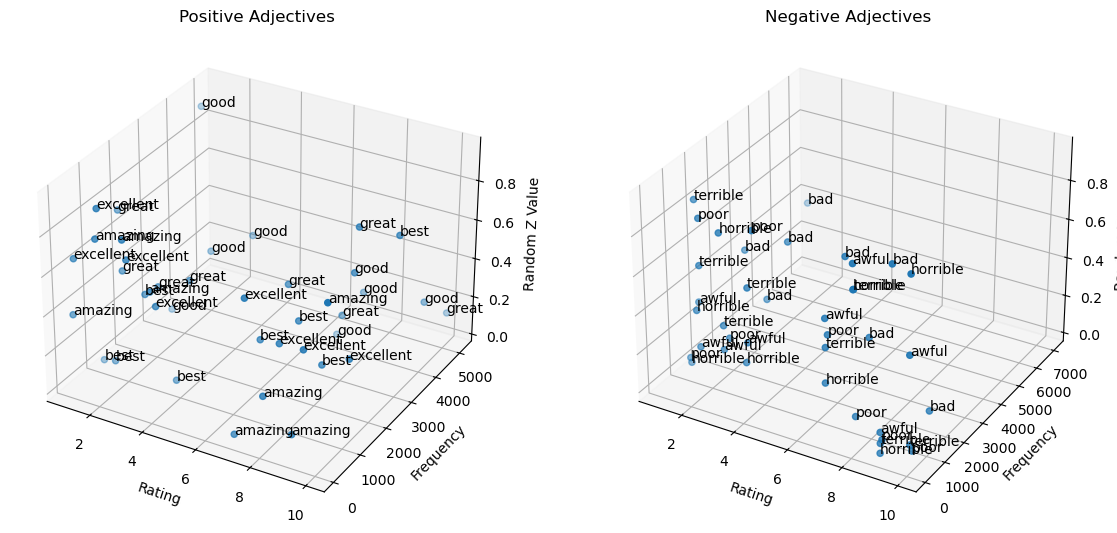

In [3]:
# Load the dataset
df = pd.read_csv('Rating_Cleaned.csv')

# Categorize adjectives as positive or negative (using dummy lists)
positive_adj = ['good', 'great', 'excellent', 'amazing', 'best']
negative_adj = ['bad', 'poor', 'terrible', 'horrible', 'awful']

# Function to calculate frequency of adjectives per rating
def calc_freq_per_rating(df, adj_list):
    freq_dict = {}
    for rating in df['Rating'].unique():
        selected_reviews = " ".join(df[df['Rating'] == rating]['Clean_review'])
        words = word_tokenize(selected_reviews)
        words = [word for word in words if word not in stopwords.words('english')]
        tags = pos_tag(words)
        adjectives = [word for word, tag in tags if tag in ('JJ', 'JJR', 'JJS') and word in adj_list]
        freq_dict[rating] = Counter(adjectives)
    return freq_dict

# Calculate frequencies for positive and negative adjectives
pos_freq_dict = calc_freq_per_rating(df, positive_adj)
neg_freq_dict = calc_freq_per_rating(df, negative_adj)

# Prepare data for 3D plot
def prepare_3d_data(freq_dict):
    x, y, z, labels = [], [], [], []
    for rating, counter in freq_dict.items():
        common_adjs = counter.most_common(10)
        for adj, freq in common_adjs:
            x.append(rating)
            y.append(freq)
            z.append(np.random.rand())
            labels.append(adj)
    return x, y, z, labels

# Data for positive and negative adjectives
pos_x, pos_y, pos_z, pos_labels = prepare_3d_data(pos_freq_dict)
neg_x, neg_y, neg_z, neg_labels = prepare_3d_data(neg_freq_dict)

# Create 3D plots
fig = plt.figure(figsize=(14, 7))

# Positive adjectives plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(pos_x, pos_y, pos_z)
for i in range(len(pos_labels)):
    ax1.text(pos_x[i], pos_y[i], pos_z[i], pos_labels[i])
ax1.set_xlabel('Rating')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('Random Z Value')
ax1.title.set_text('Positive Adjectives')

# Negative adjectives plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(neg_x, neg_y, neg_z)
for i in range(len(neg_labels)):
    ax2.text(neg_x[i], neg_y[i], neg_z[i], neg_labels[i])
ax2.set_xlabel('Rating')
ax2.set_ylabel('Frequency')
ax2.set_zlabel('Random Z Value')
ax2.title.set_text('Negative Adjectives')

# Display the plot
plt.show()